# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [1]:
from calcimetry.mongo_api import MongoInfo

# parameters where the database is stored, can obviously be distant.
HOST='localhost'
PORT=27010

### Retrieves all drill names

In [2]:
from calcimetry.calcimetry_api import CalcimetryAPI

mongo_info = MongoInfo(host=HOST, port=PORT)
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

/data/andra
{'DIR2001', 'NIH2012', 'SDZ1285', 'MCO3002', 'FRO1001', 'IBE2001', 'NSC1414', 'OHZ1841', 'KEY1004', 'BPE4023', 'KEY1206', 'OHZ1843', 'OHZ2010', 'SUG1202', 'DIR1002', 'MAG3003', 'OHZ1705', 'TER1202', 'KEY1203', 'DCN2001', 'OHZ2003', 'GIS1002', 'OHZ2007', 'PGZ1022', 'OHZ5001', 'OHZ6564', 'OHZ2023', 'SDZ1277', 'DPC3063', 'OHZ2001', 'OHZ7006', 'OHZ5310', 'SUG1301', 'DCN2003', 'OHZ2021', 'FOR1002', 'PAC1002', 'SDZ1276', 'GGD4023', 'KEY1005', 'FOR1001', 'SUG1104', 'DIR1001', 'SUG2020', 'TPV1322', 'KEY1207', 'KEY1205', 'SDZ1257', 'DIR2002', 'PEP2001', 'KEY1006', 'OHZ2002', 'NSC1413', 'OHZ2025', 'GGD4024', 'BPE4024', 'OHZ2020', 'GIS1004', 'OMA4003', 'OHZ6560', 'SUG1302', 'OHZ2004', 'OHZ7102', 'OHZ6565', 'SDZ1289', 'OHZ1525', 'MAG3001', 'SUG2101', 'MAG3002', 'OHZ2026', 'SDZ1291', 'TPV1321', 'SUG2102', 'DPC3022', 'SUG1106', 'TER1302', 'REP2303', 'OHZ7008', 'SUG1107', 'OHZ6562', 'OHZ2022', 'OHZ2024', 'PEP1002', 'MCO3001', 'OHZ7101', 'SDZ1287', 'OHZ6128', 'OHZ2008', 'NIH2011', 'OHZ2005

### Retrieves image ids for one drillname
 

In [11]:
drillname="OHZ1845"
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    image_ids = calcimetry_api.get_images_id(drillname)
print(image_ids)

/data/andra
[1215, 1216, 1217, 1218]


### Retrieve one image and its description from its id

/data/andra
{'ImageId': 1215, 'FileName': 'GTR2012_07_0019_OHZ1845_0045_0145.jpg', 'DrillName': 'OHZ1845', 'Cote0': 45, 'Cote1': 145, 'PxSize': 2949, 'PySize': 627, 'px0': 37, 'px1': 2916, 'k_Up': [[50, 203], [1083, 202], [1453, 201], [1472, 221], [1491, 199], [2853, 203], [2888, 223], [2895, 218], [2939, 216]], 'k_Down': [[50, 348], [1064, 345], [1473, 342], [2118, 342], [2875, 339], [2895, 330], [2931, 343], [2943, 343]], 'k_Arrow': [[52, 257], [1079, 257], [2045, 254], [2947, 264]]}
# of measurements for this img: 4


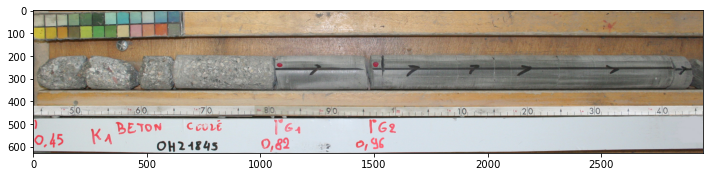

In [12]:
import matplotlib.pyplot as plt
from calcimetry.carrot_img import CarrotImage
IMG_ID = image_ids[0]
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID) # return a CarrotImage object
    fig = plt.figure(figsize=(12,6))
    plt.imshow(img.jpg) # img.jpg is the field with the jpg image itself.

    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [13]:
from calcimetry.measurement import Measurement

idx_measure = 0
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



Measure (2381): (82->24)


Text(0.5, 0, 'val1m: 24')

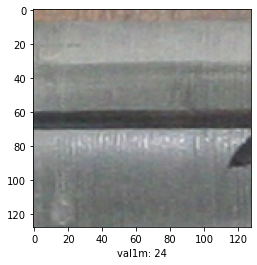

In [14]:
dim = 128

p_x = img.p_x(measure.cote) + dim // 2
center = (
    p_x, # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(p_x) # get on k_arrow line the position in pixel from this measure
    )
vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


### Retrieves images infos as a pandas dataframe

In [15]:
import pandas as pd
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

/data/andra
   ImageId                               FileName DrillName  Cote0  Cote1  \
0        0  GTR2012-07_0023_BPE4023_0000_0110.jpg   BPE4023      0    110   
1        1  GTR2012-07_0023_BPE4023_0090_0200.jpg   BPE4023     90    200   
2        2  GTR2012-07_0023_BPE4023_0180_0290.jpg   BPE4023    180    290   
3        3  GTR2012-07_0023_BPE4023_0270_0380.jpg   BPE4023    270    380   
4        4  GTR2012-07_0023_BPE4023_0350_0440.jpg   BPE4023    350    440   

   PxSize  PySize    px0     px1  \
0    3231     625   28.0  3137.0   
1    3456     630  172.0  3311.0   
2    3456     630  135.0  3273.0   
3    3456     636   97.0  3224.0   
4    2824     640    2.0  2574.0   

                                                k_Up  \
0  [[55, 173], [259, 179], [430, 177], [583, 171]...   
1  [[11, 187], [556, 189], [1081, 190], [1590, 18...   
2  [[8, 166], [388, 171], [1155, 177], [2061, 184...   
3  [[5, 181], [811, 182], [1253, 190], [2597, 199...   
4  [[6, 185], [186, 187], [5